# Gradiente Descendente

Dada uma função de estimação $\hat{y}$ e uma função de perda $\ell$ (_loss function_, que compara quão boa é a função estimadora $\hat{y}$ em relação aos casos reais observados no treino), é possível determinar o conjunto de pesos $W$, usados por $\hat{y}$, que minimizam a perda $\ell$.

* Estimador (usando maiusculas para indicar notação vetorial e considerando peso livre incorporado à W): 
    - $\hat{Y}^{m \times 1} = X^{m \times n} W^{n \times 1}$
* Perda (neste caso, por exemplo, a média do quadrado da diferença): 
    - $\ell(\hat{Y}, Y) = \frac{1}{m} \sum \frac{1}{2}(\hat{Y} - Y)^2$
    - $\ell(\hat{Y}, Y) = \frac{1}{m} \sum \frac{1}{2}(X W - Y)^2$

Para minimizar $\ell$, precisamos achar $W$ tal que $\frac{\partial \ell(\hat{Y}, Y)}{\partial W} = 0$. Para o caso específico da função de perda dada, a soma dos quadrados das diferenças, temos que obter $W$ com ajuda da expressão (a redução à soma foi retirada para facilitar a visualização, mas ela é trivial desde que a derivada da soma de termos é a soma das derivadas dos termos):

* $\frac{\partial \ell(\hat{Y}, Y)}{\partial W}$ = $\frac{\partial \frac{1}{m} \sum \frac{1}{2}(X W - Y)^2}{\partial W} \\= \frac{\partial}{\partial W}\frac{1}{2 m} \sum (X^2 W^2 - 2 X W Y + Y^2) \\= \frac{1}{2 m} \sum (2 X^2 W - 2 X Y) \\= \frac{1}{m} \sum X^2 W - X Y \\= \frac{1}{m} \sum X^{T}X W - X^{T} Y \\= \frac{1}{m} \sum X^{T}(X W - Y)$

Embora $W$ possa ser obtido de forma exata, resolvendo $\frac{1}{m} \sum X^{T}(X W - Y) = 0$, isto envolve uma inversão matricial, o que torna o algoritmo inviável na prática. Assim, vamos obter a solução através de um método iterativo, o Gradiente Descendente (GD). No GD, o conjunto de pesos $W$ é atualizado ao longo de $E$ épocas de acordo com o valor do gradiente de $\ell$ ($\nabla \ell$), ou seja (para o nosso exemplo), o valor assumido pela derivada $\frac{\partial \ell(\hat{Y}, Y)}{\partial W} = \nabla \ell = \frac{1}{m} \sum X^{T}(X W - Y)$. 

De forma geral, o algoritmo é:

* Inicie $W$ com um valor qualquer;
* Para $E$ épocas:
    * Estime $\hat{Y} = X W$ usando exemplos de treino;
    * Calcule $\ell(\hat{Y}, Y)$;
    * Obtenha o gradiente $\nabla \ell = \frac{\partial \ell(\hat{Y}, Y)}{\partial W}$;
    * Atualize $W$ de forma que $W = W - \eta \nabla \ell$, onde $\eta$ (taxa de aprendizado) é a proporção do gradiente que corresponde ao passo.
* Retorne $W$

## GD em Numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Para implementarmos o GD em Numpy, vamos tratar os pesos livres (_biases_) como pesos aplicados a um atributo $X_0$ de valor constante igual a 1. Assim, a matrix $X$ será acrescida de uma coluna de 1's. Se a matriz é:

$$
\begin{bmatrix}
    x_{11} & x_{12} & \dots  & x_{1n} \\
    x_{21} & x_{22} & \dots  & x_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & \dots  & x_{dn}
\end{bmatrix}$$

Ela se tornará:

$$
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots  & x_{1n} \\
    1 & x_{21} & x_{22} & \dots  & x_{2n} \\
    1 & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{d1} & x_{d2} & \dots  & x_{dn}
\end{bmatrix}
$$


In [4]:
def GD(X, y, lrate, epochs):
    losses = []
    X = np.c_[np.ones((X.shape[0])), X] # insert bias
    m, n = X.shape 
    W = np.zeros(n)
    for i in range(0, epochs):
        yhat = np.dot(X, W)
        error = yhat - y
        loss = np.sum(error ** 2) / (2 * m)
        losses += [loss]
        print "%3d: %f" % (i, loss)
        Gw = np.dot(X.T, error) / m
        W = W - lrate * Gw
    return W, losses

### Testando nossa implementação

In [5]:
bpm = pd.read_csv('bpm.csv')

In [6]:
bpm

,Idade,Altura,Peso,BPM
0,73,165,63,66
1,57,177,68,86
2,50,164,75,80
3,71,170,52,92
4,32,173,75,74
5,31,168,80,69
6,36,185,95,85
7,36,176,65,85
8,59,174,74,63
9,64,160,63,65


In [7]:
for c in ['Idade', 'Altura', 'Peso']:
    bpm[c] = (bpm[c] - bpm[c].mean()) / bpm[c].std()

In [8]:
bpm

,Idade,Altura,Peso,BPM
0,1.646529,-1.080847,-0.870186,66
1,0.579619,0.732187,-0.398835,86
2,0.112846,-1.231934,0.261056,80
3,1.513165,-0.325416,-1.907158,92
4,-1.087427,0.127842,0.261056,74
5,-1.154109,-0.627589,0.732407,69
6,-0.820700,1.940877,2.146459,85
7,-0.820700,0.581101,-0.681646,85
8,0.712983,0.278928,0.166786,63
9,1.046392,-1.836278,-0.870186,65


In [9]:
X = bpm.values[:,:-1]
y = bpm.values[:,-1]

In [10]:
W, losses = GD(X, y, 0.1, 40)

  0: 2741.000000
  1: 2230.518155
  2: 1816.939076
  3: 1481.858160
  4: 1210.367532
  5: 990.391496
  6: 812.148336
  7: 667.714420
  8: 550.671162
  9: 455.819070
 10: 378.946145
 11: 316.640280
 12: 266.137312
 13: 225.197940
 14: 192.008029
 15: 165.097858
 16: 143.276700
 17: 125.579844
 18: 111.225664
 19: 99.580859
 20: 90.132288
 21: 82.464151
 22: 76.239512
 23: 71.185328
 24: 67.080320
 25: 63.745150
 26: 61.034459
 27: 58.830425
 28: 57.037532
 29: 55.578345
 30: 54.390078
 31: 53.421819
 32: 52.632275
 33: 51.987954
 34: 51.461685
 35: 51.031421
 36: 50.679268
 37: 50.390701
 38: 50.153928
 39: 49.959367


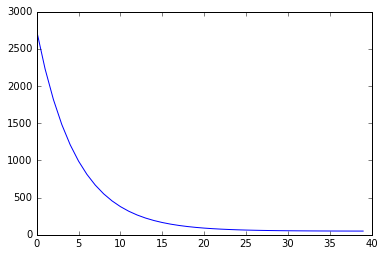

In [11]:
plt.plot(losses)

O conjunto de pesos obtidos pelo GD pode agora ser usado para prever o BPM:

In [12]:
W

array([72.1483538 ,  1.47151542,  4.55980766, -3.0916883 ])

In [13]:
bpm['BPMhat'] = W[0] + W[1]*bpm.Idade + W[2]*bpm.Altura + W[3]*bpm.Peso

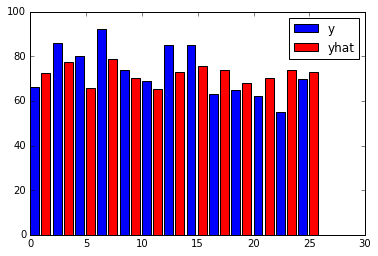

In [14]:
plt.bar(np.arange(13)*2, bpm.BPM, label = 'y', color = 'b')
plt.bar(np.arange(13)*2+1, bpm.BPMhat, label = 'yhat', color = 'r')
plt.legend()

### Uma versão com lotes

Note que a estimativa não precisa ser feitas com todas as instâncias da entrada. Podemos usar apenas _m_ instâncias, o que é conhecida como estimativa baseada em _lotes_ (_batches_). Abaixo, temos a implementação do GD baseado em lotes ou _mini batch GD_:

In [15]:
def GDb(X, y, lrate, epochs, m):
    losses = []
    X = np.c_[np.ones((X.shape[0])), X]
    m, n = X.shape 
    W = np.zeros(n)
    for i in range(0, epochs):
        idxs = np.random.randint(X.shape[0], size = m)
        Xb = X[idxs]
        yb = y[idxs]
        yhat = np.dot(Xb, W)
        error = yhat - yb
        loss = np.sum(error ** 2) / (2 * m)
        losses += [loss]
        # print "%3d: %f" % (i, loss)
        Gw = np.dot(Xb.T, error) / m
        W = W - lrate * Gw
    return W, losses

In [16]:
W, losses = GDb(X, y, 0.1, 40, 6)

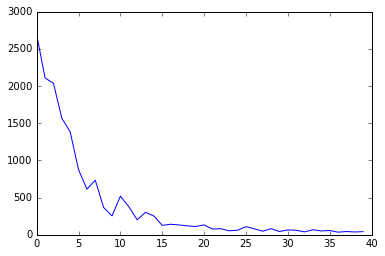

In [17]:
plt.plot(losses)

Note a maior variância do resultado. Abaixo, temos os pesos W, praticamente os mesmos obtidos pelo método original.

In [18]:
W

array([73.39716365,  0.69215404,  5.29753901, -3.09866299])

### GD estocástico

Um caso especial do método baseado em lotes ocorre quando o tamanho do lote é 1. Este método é conhecido como Gradiente Descendente Estocástico e é muito usado especialmente em problemas _on-line_.

In [19]:
W, losses = GDb(X, y, 0.1, 40, 1)

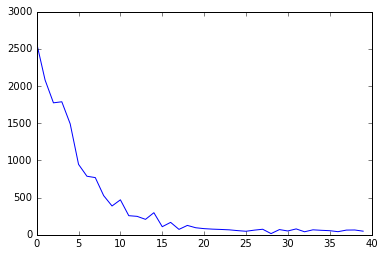

In [20]:
plt.plot(losses)

In [21]:
W

array([71.27867683,  0.65069685,  3.59899861, -1.84017232])

### Regressores usados para classificação (regressor logístico)

Regressores podem ser usados para classificação. Suponha que desejamos saber se uma pessoa esta acima ou abaixo de uma certa idade I apartir de variáveis Altura, Peso e BPM. Visto desta forma, este é um problema de classificação. Note, contudo, que isto é equivalente a estimar se a probabilidade de uma pessoa estar acima ou abaixo da idade I é maior que 0.5. Desta forma, ele se torna um problema de regressão (previsão numérica da probabilidade).  

Esta ideia pode ser generalizada para múltiplas categorias pois a classificação de _n_ categorias pode ser vista meramente como a combinação de _n_ regressores logísticos, um para cada categoria. O regressor que fornecer a maior probabilidade define a classe mais provável.

Para entendermos a ideia na prática, vamos supor que queremos prever, a partir das variáveis Altura, Peso e BPM, se uma pessoa tem menos de 41 anos, mais de 60, ou está entre 41 e 60.

In [22]:
bpm = pd.read_csv('bpm.csv')

Incialmente, vamos criar um campo IdadeCat para representar as três faixas de idade e apagar o campo Idade, em seguida:

In [23]:
bpm['IdadeCat'] = bpm.Idade.apply(lambda v: 0 if v <= 40 else 1 if v <= 61 else 2)
bpm = bpm.drop('Idade', axis = 1)

In [24]:
bpm

,Altura,Peso,BPM,IdadeCat
0,165,63,66,2
1,177,68,86,1
2,164,75,80,1
3,170,52,92,2
4,173,75,74,0
5,168,80,69,0
6,185,95,85,0
7,176,65,85,0
8,174,74,63,1
9,160,63,65,2


Agora aplicamos as normalizações tradicionais:

In [25]:
for c in ['Altura', 'Peso', 'BPM']:
    bpm[c] = (bpm[c] - bpm[c].mean()) / bpm[c].std()

E modificamos o campo IdadeCat para três novos campos que determinam se a pessoa está ou não em cada faixa etária alvo:

In [26]:
bpm = bpm.join(pd.get_dummies(bpm.IdadeCat)).drop('IdadeCat', axis = 1)

In [27]:
bpm

,Altura,Peso,BPM,0,1,2
0,-1.080847,-0.870186,-0.636160,0,0,1
1,0.732187,-0.398835,1.123431,0,1,0
2,-1.231934,0.261056,0.595554,0,1,0
3,-0.325416,-1.907158,1.651308,0,0,1
4,0.127842,0.261056,0.067677,1,0,0
5,-0.627589,0.732407,-0.372221,1,0,0
6,1.940877,2.146459,1.035451,1,0,0
7,0.581101,-0.681646,1.035451,1,0,0
8,0.278928,0.166786,-0.900098,0,1,0
9,-1.836278,-0.870186,-0.724139,0,0,1


In [28]:
X = bpm.values[:,:3]
Y = bpm.values[:,3:]

Nosso problema agora se tornou uma regressão multipla (várias variáveis de entrada) multi-variada (várias variáveis de saída). Precisamos modificar nosso programa para suportar isso.

Basicamente, vamos fazer W ser iniciado com ${\bf 0}^{n \times p}$ onde $n$ é o número de colunas em X (ou seja, o número de variáveis de entrada) e $p$ é o número de colunas em Y (número de variáveis de saída). 

Além disso, vamos introduzir uma função sigmoid em nosso estimador de forma que ele produza probabilidades, já que queremos prever probabilidades agora. Em particular, após esta transformação, temos o que chamamos de um __regressor logístico__. 

In [29]:
sigmoid = lambda x: 1.0 / (1.0 + np.exp(-x))

def GDrl(X, y, lrate, epochs):
    losses = []
    X = np.c_[np.ones((X.shape[0])), X] # insert bias
    m, n = X.shape 
    W = np.zeros((n, y.shape[1]))
    for i in range(0, epochs):
        yhat = sigmoid(np.dot(X, W)) # probability
        error = yhat - y
        loss = np.sum(error ** 2) / (2 * m)
        losses += [loss]
        print "%3d: %f" % (i, loss)
        Gw = np.dot(X.T, error) / m
        W = W - lrate * Gw
    return W, losses

In [30]:
Ws, losses = GDrl(X, Y, 0.1, 40)

  0: 0.375000
  1: 0.365656
  2: 0.356919
  3: 0.348764
  4: 0.341157
  5: 0.334066
  6: 0.327456
  7: 0.321291
  8: 0.315539
  9: 0.310166
 10: 0.305143
 11: 0.300442
 12: 0.296037
 13: 0.291904
 14: 0.288022
 15: 0.284370
 16: 0.280930
 17: 0.277686
 18: 0.274624
 19: 0.271729
 20: 0.268989
 21: 0.266393
 22: 0.263930
 23: 0.261592
 24: 0.259370
 25: 0.257256
 26: 0.255243
 27: 0.253324
 28: 0.251493
 29: 0.249745
 30: 0.248075
 31: 0.246477
 32: 0.244949
 33: 0.243484
 34: 0.242081
 35: 0.240735
 36: 0.239443
 37: 0.238202
 38: 0.237010
 39: 0.235863


In [31]:
Ws

array([[-0.09965342, -0.49279271, -0.73264971],
       [ 0.53835179,  0.02135372, -0.59132336],
       [ 0.59783358,  0.06099958, -0.69380513],
       [-0.17001497,  0.11131028,  0.0405053 ]])

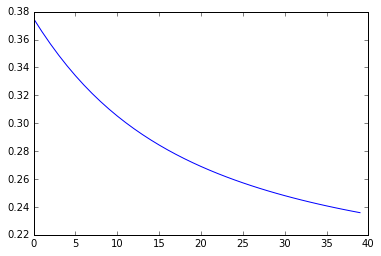

In [32]:
plt.plot(losses)

In [33]:
def predict(X, W):
    X = np.c_[np.ones((X.shape[0])), X] # insert bias
    yhat = sigmoid(np.dot(X, W))
    return yhat

In [34]:
predict(X, Ws)

array([[0.2509411 , 0.34529968, 0.61879869],
       [0.46632195, 0.4069865 , 0.30082127],
       [0.33002937, 0.39248381, 0.45979267],
       [0.15502088, 0.39358445, 0.70053763],
       [0.52840253, 0.38542001, 0.27157894],
       [0.5159005 , 0.37684775, 0.29219108],
       [0.88619031, 0.44888957, 0.03463577],
       [0.40845168, 0.3997018 , 0.36322415],
       [0.57523643, 0.35965706, 0.25927079],
       [0.18462382, 0.33946277, 0.71658666],
       [0.70065246, 0.36878886, 0.15897058],
       [0.61606293, 0.34068447, 0.24487368],
       [0.58327663, 0.37769931, 0.23513086]])

In [35]:
print np.argmax(predict(X, Ws), axis = 1)
print np.argmax(Y, axis = 1)

[2 0 2 2 0 0 0 0 0 2 0 0 0]
[2 1 1 2 0 0 0 0 1 2 0 0 1]


In [36]:
def predict_softmax(X, W):
    X = np.c_[np.ones((X.shape[0])), X] # insert bias
    yhat = np.exp(np.dot(X, W))
    return yhat / yhat.sum(axis = 1).reshape(-1,1)

In [37]:
predict_softmax(X, Ws)

array([[0.13477372, 0.21217931, 0.65304696],
       [0.43901476, 0.34481648, 0.21616876],
       [0.24756512, 0.32468075, 0.42775413],
       [0.05784111, 0.20462562, 0.73753327],
       [0.52841253, 0.29575734, 0.17583013],
       [0.51155314, 0.29028942, 0.19815744],
       [0.9015402 , 0.09430576, 0.00415404],
       [0.35836849, 0.34557986, 0.29605166],
       [0.59765652, 0.24787259, 0.15447089],
       [0.06927019, 0.15722134, 0.77350847],
       [0.75166784, 0.18762994, 0.06070222],
       [0.65611453, 0.21128743, 0.13259805],
       [0.60486483, 0.26228745, 0.13284772]])